SVM Model Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



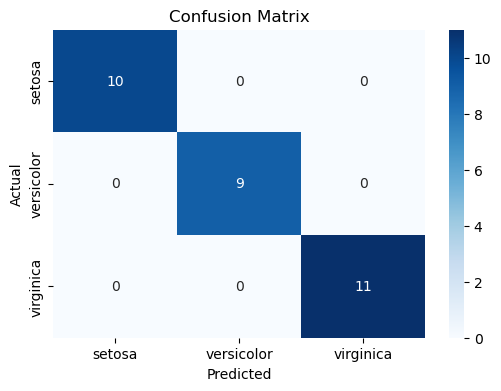

In [5]:
#SUPPORT VECTOR MACHINE
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Train an SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Try different kernels like 'linear' or 'poly'
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [6]:
#RANDOM FOREST
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Load dataset
data = pd.read_csv(r"D:\Wise Work\Week 2\creditcard.csv")

# Separate features and target
X = data.drop(columns=["Class"])
y = data["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights to handle imbalance
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Train Random Forest model with class weights
rf_model = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dict, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9923 - loss: 0.0344 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 2/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 3/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 4/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 5/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 6/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 7/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9994 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 8/20
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9993 - loss: 0

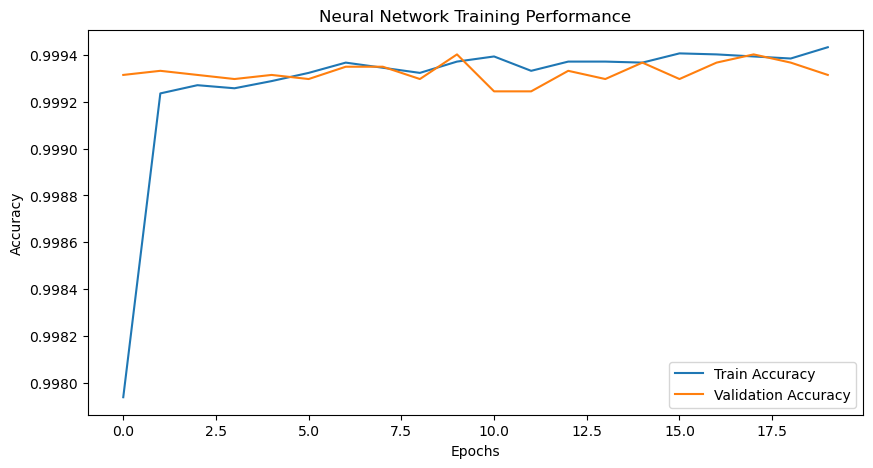

In [6]:
!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("creditcard.csv")

# Step 2: Preprocess the Data
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target variable (0 = Not Fraud, 1 = Fraud)

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Handle Class Imbalance (Optional: Undersampling or SMOTE)
# Since fraud cases are rare, we can oversample the minority class using SMOTE (not included in this basic implementation).

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Build the Neural Network Model
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Dropout for regularization
    Dense(16, activation="relu"),  # Hidden Layer
    Dropout(0.3),
    Dense(1, activation="sigmoid")  # Output Layer (Binary Classification)
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 6: Train the Neural Network
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 7: Evaluate the Model
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

# Step 8: Model Performance Metrics
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

print("\nModel Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Step 9: Plot Training Performance
plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Neural Network Training Performance")
plt.show()
